In [1]:
%matplotlib inline


# Receiver Operating Characteristic (ROC)

Example of Receiver Operating Characteristic (ROC) metric to evaluate
classifier output quality.

ROC curves typically feature true positive rate on the Y axis, and false
positive rate on the X axis. This means that the top left corner of the plot is
the "ideal" point - a false positive rate of zero, and a true positive rate of
one. This is not very realistic, but it does mean that a larger area under the
curve (AUC) is usually better.

The "steepness" of ROC curves is also important, since it is ideal to maximize
the true positive rate while minimizing the false positive rate.

ROC curves are typically used in binary classification to study the output of
a classifier. In order to extend ROC curve and ROC area to multi-label
classification, it is necessary to binarize the output. One ROC
curve can be drawn per label, but one can also draw a ROC curve by considering
each element of the label indicator matrix as a binary prediction
(micro-averaging).

Another evaluation measure for multi-label classification is
macro-averaging, which gives equal weight to the classification of each
label.

<div class="alert alert-info"><h4>Note</h4><p>See also :func:`sklearn.metrics.roc_auc_score`,
             `sphx_glr_auto_examples_model_selection_plot_roc_crossval.py`</p></div>


In [2]:
methods = ['DHN', 'PalmNet', 'DHPN', 'BOCV', 'PalmCode']

import scipy.io
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

import sklearn

methods = ['DHPN','PalmNet','DHPN','BOCV','PalmCode']#'CoLH',

def loadscore(mtd,ds):
    dirs = 'D:/research_project/palmprintVein/Leng_Lu/databases/'+ds+'/'+mtd+'/'
    # dirs = 'D:/research_project/palmprintVein/Leng_Lu/databases/Tongji/DHN/'
    DisIntra = scipy.io.loadmat(dirs + 'DisIntra.mat')['DisIntra']
    DisInter = scipy.io.loadmat(dirs + 'DisInter.mat')['DisInter']
    DisIntra =  np.squeeze(DisIntra)
    DisInter =  np.squeeze(DisInter)
    return DisIntra,DisInter

# DisIntra_r,DisInter_r = loadscore('DHN','Red')
# DisIntra_g,DisInter_g = loadscore('DHN','Green')# green data is not right
# DisIntra_b,DisInter_b = loadscore('DHN','Blue')
# DisIntras=[]
# DisInters=[]
# for i in methods:
#     DisIntra_n,DisInter_n = loadscore(i,'NIR')
#     DisIntras.append(DisIntra_n)
#     DisInters.append(DisInter_n)

# # DisIntra,DisInter = loadscore('DHN','Tongji')

# # DisIntra = (DisIntra_r + DisIntra_b + DisIntra_n)*0.3333
# # DisInter = (DisInter_r + DisInter_b + DisInter_n)*0.3333
# DisIntras = np.array(DisIntras)
# DisInters = np.array(DisInters)

def compute_eer(label, pred, positive_label=1):
    # all fpr, tpr, fnr, fnr, threshold are lists (in the format of np.array)
    fpr, tpr, threshold = sklearn.metrics.roc_curve(label, pred)#, positive_label
    fnr = 1 - tpr

    # the threshold of fnr == fpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

    # theoretically eer from fpr and eer from fnr should be identical but they can be slightly differ in reality
    eer_1 = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    eer_2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

    # return the mean of eer from fpr and from fnr
    eer = (eer_1 + eer_2) / 2
    return eer,fpr, tpr, threshold 

eers, fprs, tprs = [],[],[]
for i in methods:
    DisIntra,DisInter = loadscore(i,'NIR')
    predicts = np.concatenate((DisIntra, DisInter), axis=0)
    labels = np.concatenate((np.zeros_like(DisIntra), np.ones_like(DisInter)), axis=0)
    eer, fpr, tpr, threshold = compute_eer(labels,predicts)
    print(eer*100,"%",i)
    eers.append(eer)
    fprs.append(fpr)
    tprs.append(tpr)

import itertools
marker = itertools.cycle(('X' ,'+', '.', 'o', '*','x','D')) 

plt.figure()
plt.semilogx()

for i in range(len(methods)):
    plt.plot(
        fprs[i],
        tprs[i],
        marker = next(marker), 
        # color="darkorange",
        # label="ROC curve (area = %0.5f)" % roc_auc1,
        label=methods[i],
    )
# plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.8, 1.01])
# plt.xscale("log")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()



(920,)
(422280,)
0.7590934924694531 %
(920,)
(422280,)
1.7081083641185955 %
(920,)
(422280,)
1.539736667613904 %
2.8717912285687244 % DHN
3.7308184143222514 % PalmNet
3.390759685516716 % DHPN
4.9018186984938925 % BOCV
6.091228568722175 % PalmCode


C:\Users\HASEE\AppData\Local\Temp/ipykernel_52172/2875276946.py:97: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


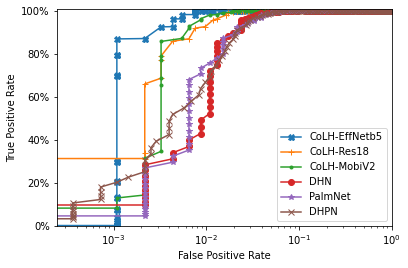

In [4]:
import pickle
with open('./dataset/FEATS_EVAL_effb5iitd128.pkl', 'rb') as fin :
    # print(pickle.load(fin))
    a = pickle.load(fin)
pred_scores_prints_center = a['pred_scores_prints_center']
gt_label_prints_center = a['gt_label_prints_center']
# pred_scores_prints_center = a['pred_scores_veins_center']
# gt_label_prints_center = a['gt_label_veins_center']
intra_scores = 1- pred_scores_prints_center[gt_label_prints_center]
inter_scores = 1- pred_scores_prints_center[gt_label_prints_center==False]
print(intra_scores.shape)
print(inter_scores.shape)

eers, fprs, tprs = [],[],[]
predicts = np.concatenate((intra_scores, inter_scores), axis=0)
labels = np.concatenate((np.zeros_like(intra_scores), np.ones_like(inter_scores)), axis=0)
eer, fpr, tpr, threshold = compute_eer(labels,predicts)
print(eer*100,"%")
eers.append(eer)
fprs.append(fpr)
tprs.append(tpr)

with open('./dataset/FEATS_EVAL_res18iitd128.pkl', 'rb') as fin :
    # print(pickle.load(fin))
    a = pickle.load(fin)
pred_scores_prints_center = a['pred_scores_prints_center']
gt_label_prints_center = a['gt_label_prints_center']
# pred_scores_prints_center = a['pred_scores_veins_center']
# gt_label_prints_center = a['gt_label_veins_center']
intra_scores = 1- pred_scores_prints_center[gt_label_prints_center]
inter_scores = 1- pred_scores_prints_center[gt_label_prints_center==False]
print(intra_scores.shape)
print(inter_scores.shape)

predicts = np.concatenate((intra_scores, inter_scores), axis=0)
labels = np.concatenate((np.zeros_like(intra_scores), np.ones_like(inter_scores)), axis=0)
eer, fpr, tpr, threshold = compute_eer(labels,predicts)
print(eer*100,"%")
eers.append(eer)
fprs.append(fpr)
tprs.append(tpr)

with open('./dataset/FEATS_EVAL_mobileiitd128.pkl', 'rb') as fin :
    # print(pickle.load(fin))
    a = pickle.load(fin)
pred_scores_prints_center = a['pred_scores_prints_center']
gt_label_prints_center = a['gt_label_prints_center']
# pred_scores_prints_center = a['pred_scores_veins_center']
# gt_label_prints_center = a['gt_label_veins_center']
intra_scores = 1- pred_scores_prints_center[gt_label_prints_center]
inter_scores = 1- pred_scores_prints_center[gt_label_prints_center==False]
print(intra_scores.shape)
print(inter_scores.shape)

predicts = np.concatenate((intra_scores, inter_scores), axis=0)
labels = np.concatenate((np.zeros_like(intra_scores), np.ones_like(inter_scores)), axis=0)
eer, fpr, tpr, threshold = compute_eer(labels,predicts)
print(eer*100,"%")
eers.append(eer)
fprs.append(fpr)
tprs.append(tpr)

methods = ['DHN','PalmNet','DHPN','BOCV','PalmCode']#'CoLH','CoLH-Mob'


for i in methods:
    DisIntra,DisInter = loadscore(i,'IITD')
    predicts = np.concatenate((DisIntra, DisInter), axis=0)
    labels = np.concatenate((np.zeros_like(DisIntra), np.ones_like(DisInter)), axis=0)
    eer, fpr, tpr, threshold = compute_eer(labels,predicts)
    print(eer*100,"%",i)
    eers.append(eer)
    fprs.append(fpr)
    tprs.append(tpr)


import itertools
from matplotlib.ticker import PercentFormatter

marker = itertools.cycle(('X' ,'+', '.', 'o', '*','x','D')) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.semilogx()
methods = ['CoLH-EffNetb5','CoLH-Res18','CoLH-MobiV2','DHN','PalmNet','DHPN']#'CoLH','CoLH-Mob'

for i in range(len(methods)):
    ax.plot(
        fprs[i],
        tprs[i],
        marker = next(marker), 
        # color="darkorange",
        # label="ROC curve (area = %0.5f)" % roc_auc1,
        label=methods[i],
    )
# plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
ax.yaxis.set_major_formatter(PercentFormatter(xmax = 1))
# ax.xaxis.set_major_formatter(PercentFormatter(xmax = 1))

# plt.xscale("log")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()
fig = ax.get_figure()
fig.savefig('RoC_CoLH_IITD.svg')

C:\Program Files (x86)\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files (x86)\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files (x86)\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

Text(0.5, 17.200000000000003, 'Distance')

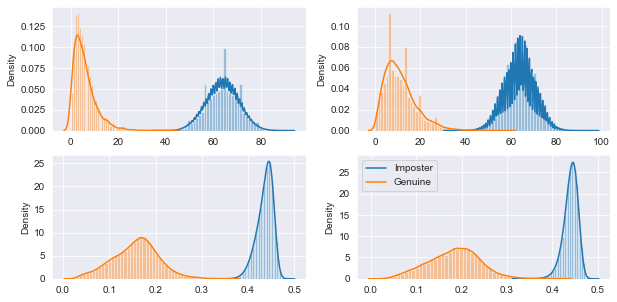

In [ ]:
import seaborn as sns
fig, ax_arr = plt.subplots(2,2, figsize=(10,5))

DisIntra,DisInter = loadscore(methods[0],'Tongji')
sns.set_style('darkgrid')
chart = sns.distplot(DisInter,ax = ax_arr[0][0])
chart = sns.distplot(DisIntra,ax = ax_arr[0][0])
plt.legend(labels=["Imposter","Genuine"])
ax.set_title(methods[0])
ax.set_xlabel('Distance')

DisIntra,DisInter = loadscore(methods[1],'Tongji')
sns.set_style('darkgrid')
chart = sns.distplot(DisInter,ax = ax_arr[0][1])
chart = sns.distplot(DisIntra,ax = ax_arr[0][1])
plt.legend(labels=["Imposter","Genuine"])
ax.set_title(methods[1])
ax.set_xlabel('Distance')

DisIntra,DisInter = loadscore(methods[2],'Tongji')
sns.set_style('darkgrid')
chart = sns.distplot(DisInter,ax = ax_arr[1][0])
chart = sns.distplot(DisIntra,ax = ax_arr[1][0])
plt.legend(labels=["Imposter","Genuine"])
ax.set_title(methods[2])
ax.set_xlabel('Distance')



(3000,)
(1497000,)
0.07233333333333333
64.07105611222445


C:\Program Files (x86)\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files (x86)\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


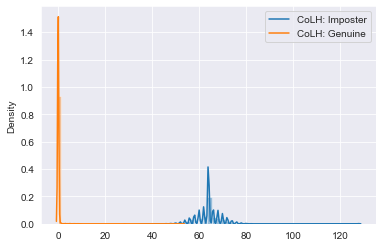

In [81]:
import pickle
with open('./dataset/FEATS_EVAL_effb5polyu128.pkl', 'rb') as fin :
    # print(pickle.load(fin))
    a = pickle.load(fin)
# pred_scores_prints_center = a['pred_scores_prints_center']
# gt_label_prints_center = a['gt_label_prints_center']
pred_scores_prints_center = a['pred_scores_veins_center']
gt_label_prints_center = a['gt_label_veins_center']
intra_scores = pred_scores_prints_center[gt_label_prints_center]
inter_scores = pred_scores_prints_center[gt_label_prints_center==False]
print(intra_scores.shape)
print(inter_scores.shape)

intra_scores = 1- intra_scores
inter_scores = 1 - inter_scores
print(np.mean(intra_scores*128))
print(np.mean(inter_scores*128))
ax = sns.distplot(inter_scores*128)
ax = sns.distplot(intra_scores*128)
plt.legend(labels=["CoLH: Imposter","CoLH: Genuine"])
fig = ax.get_figure()
fig.savefig('dist_CoLH_TJ.svg')
# https://www.cnblogs.com/tangjianwei/p/13753633.html

In [89]:
a['FEATS_prints']

array([[ 0.08323515,  0.10076146,  0.07829946, ...,  0.11197411,
         0.07482899,  0.05238963],
       [ 0.08437239,  0.11087419,  0.08065737, ...,  0.10683422,
         0.07953048,  0.04860983],
       [ 0.07718794,  0.10189395,  0.08390839, ...,  0.10684232,
         0.08711503,  0.0549434 ],
       ...,
       [-0.06920032,  0.07666112,  0.06547859, ...,  0.06014428,
         0.06888536, -0.07913347],
       [-0.07021613,  0.07811577,  0.08044645, ...,  0.08437883,
         0.07504826, -0.07341117],
       [-0.07296071,  0.07038419,  0.0738433 , ...,  0.06349587,
         0.06785637, -0.08556069]], dtype=float32)

In [43]:
for i in range(len(methods)):
    DisIntra,DisInter = loadscore(methods[i],'Tongji')
    print("mean",np.mean(DisIntra),methods[i])

mean 4.38 DHN
mean 5.834333333333333 PalmNet
mean 11.157857142857143 DHPN
mean 0.15699624433106574 BOCV
mean 0.18255616969009827 PalmCode


C:\Program Files (x86)\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files (x86)\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files (x86)\conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

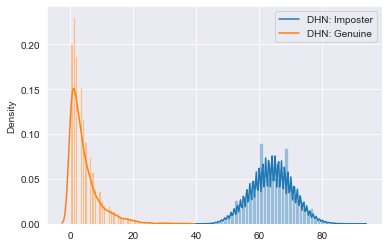

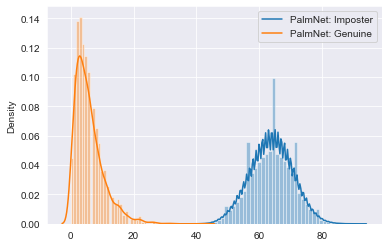

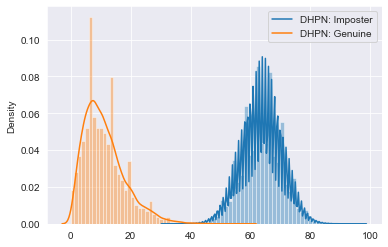

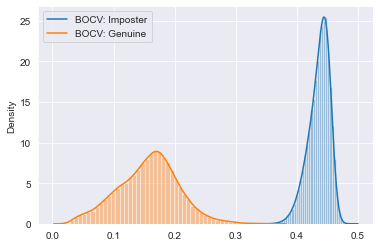

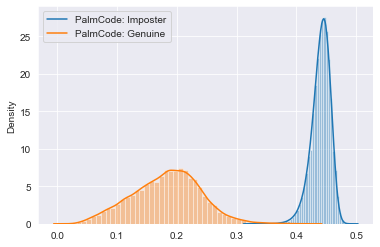

In [79]:
for i in range(len(methods)):
    fig = plt.figure()
    DisIntra,DisInter = loadscore(methods[i],'Tongji')
    sns.set_style('darkgrid')
    ax = sns.distplot(DisInter)
    ax = sns.distplot(DisIntra)
    plt.legend(labels=[methods[i]+": Imposter",methods[i]+": Genuine"])
    fig = ax.get_figure()
    fig.savefig("dist_"+methods[i]+"_TJ.svg")

# fig = plt.figure()
# DisIntra,DisInter = loadscore(methods[3],'Tongji')
# sns.set_style('darkgrid')
# chart = sns.distplot(DisInter)
# chart = sns.distplot(DisIntra)
# plt.legend(labels=[methods[3]+": Imposter",methods[3]+": Genuine"])


0.03234802939211706 % PalmNet
0.06594882840448413 % DHPN
0.007404315835033586 % BOCV
0.11732548073950556 % PalmCode


C:\Users\HASEE\AppData\Local\Temp/ipykernel_34064/3330154604.py:31: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0.0, 1.0])


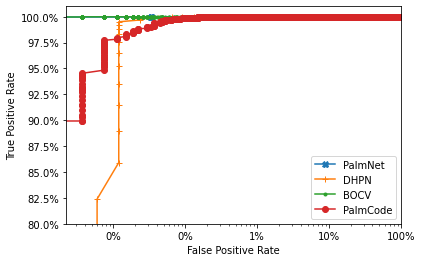

In [27]:
eers, fprs, tprs = [],[],[]
for i in methods:
    DisIntra,DisInter = loadscore(i,'Tongji')
    predicts = np.concatenate((DisIntra, DisInter), axis=0)
    labels = np.concatenate((np.zeros_like(DisIntra), np.ones_like(DisInter)), axis=0)
    eer, fpr, tpr, threshold = compute_eer(labels,predicts)
    print(eer*100,"%",i)
    eers.append(eer)
    fprs.append(fpr)
    tprs.append(tpr)

import itertools
from matplotlib.ticker import PercentFormatter

marker = itertools.cycle(('X' ,'+', '.', 'o', '*','x','D')) 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.semilogx()

for i in range(len(methods)):
    ax.plot(
        fprs[i],
        tprs[i],
        marker = next(marker), 
        # color="darkorange",
        # label="ROC curve (area = %0.5f)" % roc_auc1,
        label=methods[i],
    )
# plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.8, 1.01])
ax.yaxis.set_major_formatter(PercentFormatter(xmax = 1))
ax.xaxis.set_major_formatter(PercentFormatter(xmax = 1))

# plt.xscale("log")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
# plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [3]:

# print(DisIntra.shape,DisInter.shape)


# two large imposter score, we randomly take some to reduce computation 
# DisInter = DisInter[np.random.RandomState(seed=42).permutation(DisInter.shape[0])[:DisIntra.shape[0]*20]]
# print(DisIntra.shape,DisInter.shape)
